In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import sys
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Get the directory of the current script
try:
    # This will work if the script is being run as a file
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Use the current working directory if __file__ is not defined
    current_dir = os.getcwd()

from build_a_pipeline import build_pipeline_P0_foward_price
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

In [2]:
x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price()
model_performance = []

In [3]:
x_val = x_val.sort_index(ascending=True)
y_val = y_val.sort_index(ascending=True)

In [4]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
# Create XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(x_train, y_train)
# Predictions and evaluation
y_pred = model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
# Predictions on validation data
y_pred = model.predict(x_val)
from sklearn.metrics import r2_score
# R-squared score
r2 = r2_score(y_val, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
model_performance.append({
    'Model': model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R-squared': r2,
})

Mean Squared Error: 64.62725145161592
Root Mean Squared Error: 8.039107627816406
Mean Squared Error: 64.62725145161592
Root Mean Squared Error: 8.039107627816406
R-squared: 0.9970908445316478


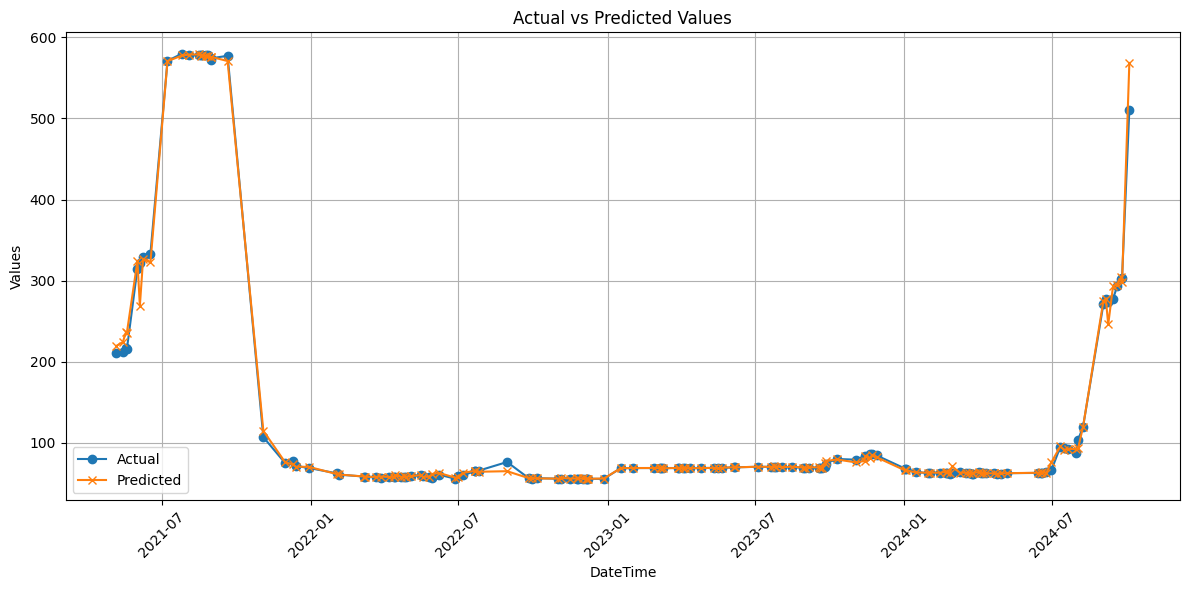

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(x_val.index, y_val, label='Actual', marker='o')
plt.plot(x_val.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [6]:
performance_df = pd.DataFrame(model_performance)
performance_df = performance_df.sort_values(by='Mean Squared Error', ascending=True)
performance_df

,Model,Mean Squared Error,Root Mean Squared Error,R-squared
0,"XGBRegressor(base_score=None, booster=None, ca...",64.627251,8.039108,0.997091


## Gradient Boosted - Adjusted Hyperparameters

In [7]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
# Create XGBoost model
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1,
    reg_lambda=1
)
model.fit(x_train, y_train)
# Predictions and evaluation
y_pred = model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
# Predictions on validation data
y_pred = model.predict(x_val)
from sklearn.metrics import r2_score
# R-squared score
r2 = r2_score(y_val, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
model_performance.append({
    'Model': model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R-squared': r2,
})

Mean Squared Error: 63.25591342380263
Root Mean Squared Error: 7.953358625373474
Mean Squared Error: 63.25591342380263
Root Mean Squared Error: 7.953358625373474
R-squared: 0.9971525744587755


## Tuned the HyperParameters using GridSearchCV

In [10]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 10]
}

from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror'),
    param_distributions=param_grid,
    n_iter=50,  # Test 50 random combinations
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42
)
random_search.fit(x_train, y_train)

# Predictions and evaluation
y_pred =random_search.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
# Predictions on validation data
from sklearn.metrics import r2_score
# R-squared score
r2 = r2_score(y_val, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
model_performance.append({
    'Model': random_search,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R-squared': r2,
})

Mean Squared Error: 60.450108346870316
Root Mean Squared Error: 7.774966774647356
Mean Squared Error: 60.450108346870316
Root Mean Squared Error: 7.774966774647356
R-squared: 0.9972788760266025


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(x_val.index, y_val, label='Actual', marker='o')
plt.plot(x_val.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [13]:
y_train

DateTime
2021-05-26    217.20
2022-10-27     56.23
2021-11-01    122.08
2021-08-23    574.50
2023-07-31     70.02
               ...  
2023-10-24     77.57
2024-10-06    510.79
2024-09-16    292.37
2022-07-01     61.02
2023-05-30     70.00
Name: P0, Length: 564, dtype: float64

In [12]:
x_train.columns

Index(['Average_Settlement_Price_SE/CW(MWh)', 'Min_Settlement_Price_SE(MWh)',
       'Hydro_Inflow_N(MWavg)', 'Hydro_Inflow_NE(MWavg)',
       'Hydro_Inflow_S(MWavg)', 'Hydro_Inflow_SE/CW(MWavg)',
       'Daily_Sum_Hydro_Inflow(MWavg)', 'Solar_Generated_Sum_NE(MWavg)',
       'Solar_Generated_Sum_SE/CW(MWavg)', 'Daily_Sum_Solar_Generated(MWavg)',
       'Wind_Generation_N(MWavg)', 'Wind_Generation_NE(MWavg)',
       'Wind_Generation_S(MWavg)', 'Wind_Generation_SUM(MWavg)',
       'Hydroelectric_capacity_N(MWavg)',
       'Hydroelectric_capacity_SE/CW(MWavg)',
       'Hydroelectric_capacity_S(MWavg)', 'Thermal_capacity_NE(MWavg)',
       'Thermal_capacity_N(MWavg)', 'Thermal_capacity_SE/CW(MWavg)',
       'Thermal_capacity_S(MWavg)', 'Wind_capacity_NE(MWavg)',
       'Wind_capacity_S(MWavg)', 'Solar_capacity_NE(MWavg)',
       'Solar_capacity_SE/CW(MWavg)', 'Total_capacity_NE(MWavg)',
       'Total_capacity_N(MWavg)', 'Total_capacity_SE/CW(MWavg)',
       'Total_capacity_S(MWavg)', 'Con